<a href="https://colab.research.google.com/github/shalujha/Face_Completion/blob/main/Face_Completion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [899]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
import xgboost as xgb

In [900]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [901]:
dataset=fetch_olivetti_faces()

In [902]:
dataset.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [903]:
data, targets = fetch_olivetti_faces(return_X_y=True)
print(type(data))
print(type(targets))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [904]:
print(data.shape,targets.shape)

(400, 4096) (400,)


In [905]:
# lets try to visualise some images first:
def showImage(img_array):
  plt.axis('off')
  plt.imshow(img_array)
  plt.show()

<class 'numpy.ndarray'>
(32, 64)


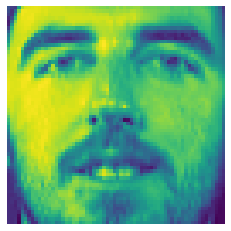

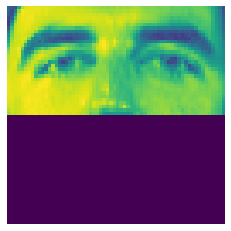

In [906]:
reshaped_image=data[100].reshape((64,64))
print(type(reshaped_image))
reshaped_image=reshaped_image[:32,:]
new_image=np.zeros((32,64))
new_reshaped_image=np.concatenate((reshaped_image,new_image),axis=0)
print(new_image.shape)
showImage(data[100].reshape((64,64)))
showImage(new_reshaped_image)

In [907]:
X=[]
Y=[]
for i in range(data.shape[0]):
  reshaped_image=data[i].reshape((64,64))
  X.append(reshaped_image[:32,:])
  Y.append(reshaped_image[32:,:])
print(len(X),len(Y))

400 400


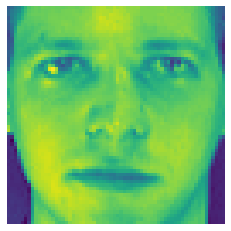

In [908]:
reshaped_image=np.concatenate((X[0],Y[0]),axis=0)
showImage(reshaped_image)

In [909]:
# splitting data 
X=np.asarray(X)
Y=np.asarray(Y)
scaler=StandardScaler()
X=scaler.fit_transform(X.reshape((-1,32*64)))
Y=scaler.fit_transform(Y.reshape((-1,32*64)))
'''
X_df=pd.DataFrame(data=X)
Y_df=pd.DataFrame(data=Y)
#print(X_df.head())
mean=X_df.mean()
print(len(mean))
for index,i in enumerate(X_df.columns):
  X_df[i]=X_df[i]-mean[i]
for index,i in enumerate(Y_df.columns):
  Y_df[i]=Y_df[i]-mean[i]
  #print(X_df[i].mean(axis=0))
'''

'\nX_df=pd.DataFrame(data=X)\nY_df=pd.DataFrame(data=Y)\n#print(X_df.head())\nmean=X_df.mean()\nprint(len(mean))\nfor index,i in enumerate(X_df.columns):\n  X_df[i]=X_df[i]-mean[i]\nfor index,i in enumerate(Y_df.columns):\n  Y_df[i]=Y_df[i]-mean[i]\n  #print(X_df[i].mean(axis=0))\n'

In [910]:
print(X_df[4].mean())
print(mean[4])

2.086162576020456e-09
2.0861626e-09


In [911]:
print(X.shape,Y.shape)
pca=PCA(n_components=0.97)
X_reduced=pca.fit_transform(X)
Y_reduced=pca.fit_transform(Y)
X_reduced=X_reduced[:,:36]
Y_reduced=Y_reduced[:,:36]
print(X_reduced.shape,Y_reduced.shape)

(400, 2048) (400, 2048)
(400, 36) (400, 36)


In [912]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(320, 2048) (320, 2048) (80, 2048) (80, 2048)


In [913]:
X_train_,X_test_,Y_train_,Y_test_=train_test_split(X_reduced,Y_reduced,test_size=0.2,shuffle=True)
print(X_train_.shape,Y_train_.shape,X_test_.shape,Y_test_.shape)

(320, 36) (320, 36) (80, 36) (80, 36)


In [914]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
print(lr.score(X_test,Y_test))
predictions=lr.predict(X_test)

0.2722380503693535


In [915]:
lr=LinearRegression()
lr.fit(X_train_,Y_train_)
print(lr.score(X_test_,Y_test_))

0.6106159089141002


In [916]:
print(len(predictions),predictions[0].shape)

80 (2048,)


In [917]:
# lets visualise what our model has predicted till now :
def visualisePrediction(test_image,predicted_image):
  test_image=test_image.reshape((32,64))
  predicted_image=predicted_image.reshape((32,64))
  stacked_image=np.concatenate((test_image,predicted_image),axis=0)
  showImage(stacked_image)

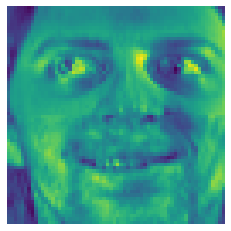

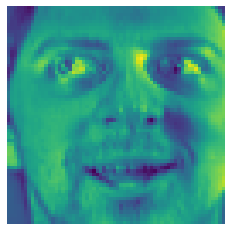

In [918]:
visualisePrediction(X_test[10],predictions[10])
visualisePrediction(X_test[10],Y_test[10])

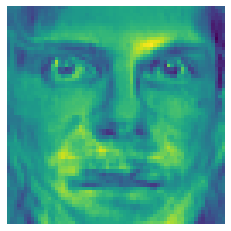

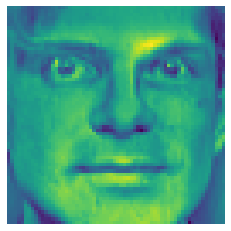

In [919]:
visualisePrediction(X_test[20],predictions[20])
visualisePrediction(X_test[20],Y_test[20])

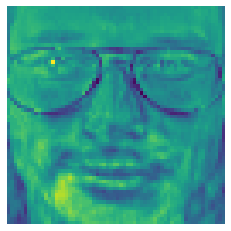

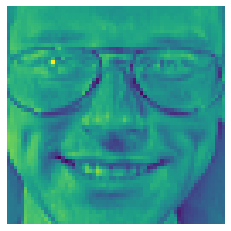

In [920]:
visualisePrediction(X_test[40],predictions[40])
visualisePrediction(X_test[40],Y_test[40])

In [921]:
r2_score(Y_test,predictions)

0.2601308522715369

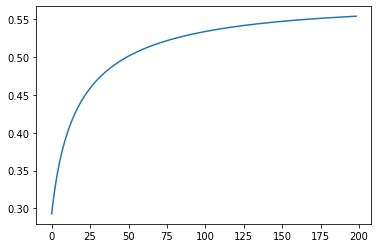

In [922]:
# lets try different regressors:
acc_list=[]
for i in range(1,200):
  rg=Ridge(alpha=i)
  rg.fit(X_train,Y_train)
  acc_list.append(rg.score(X_test,Y_test))
plt.plot(acc_list)

In [923]:
print('Maximum accuracy by Ridge Regression is {} percent'.format(acc_list[np.argmax(acc_list)]*100))
print(np.argmax(acc_list))

Maximum accuracy by Ridge Regression is 55.40254113241825 percent
198


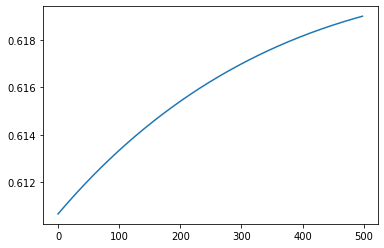

In [924]:
acc_list=[]
for i in range(1,500):
  rg=Ridge(alpha=i)
  rg.fit(X_train_,Y_train_)
  acc_list.append(rg.score(X_test_,Y_test_))
plt.plot(acc_list)

In [925]:
print('Maximum accuracy by Ridge Regression is {} percent'.format(acc_list[np.argmax(acc_list)]*100))
print(np.argmax(acc_list))

Maximum accuracy by Ridge Regression is 61.901500355406604 percent
498


In [926]:

neighbor=KNeighborsRegressor()
neighbor.fit(X_train,Y_train)
neighbor.score(X_test,Y_test)

0.5060638017488334

In [927]:
acc_list=[]
for i in range(1,100):
  neighbor=KNeighborsRegressor(n_neighbors=i)
  neighbor.fit(X_train,Y_train)
  acc_list.append(neighbor.score(X_test,Y_test))

2
Maximum accuracy by K nearest neighbor is 54.013103787216984 percent


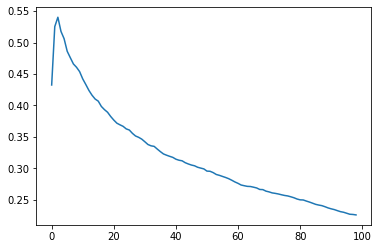

In [928]:
plt.plot(acc_list)
print(np.argmax(acc_list))
print('Maximum accuracy by K nearest neighbor is {} percent'.format(acc_list[np.argmax(acc_list)]*100))

In [929]:
acc_list=[]
for i in range(1,100):
  neighbor=KNeighborsRegressor(n_neighbors=i)
  neighbor.fit(X_train_,Y_train_)
  acc_list.append(neighbor.score(X_test_,Y_test_))

In [930]:
print(np.argmax(acc_list))

2


In [931]:
print('Maximum accuracy by K nearest neighbor is {} percent'.format(acc_list[np.argmax(acc_list)]*100))

Maximum accuracy by K nearest neighbor is 67.46988411306701 percent


In [932]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=32,max_depth=14)
rf.fit(X_train_,Y_train_)
print(rf.score(X_test_,Y_test_))

0.5673432406465639


In [933]:
acc_list=[]
for i in range(1,100):
  rf=RandomForestRegressor(n_estimators=i)
  rf.fit(X_train_,Y_train_)
  acc_list.append(rf.score(X_test_,Y_test_))

In [934]:
print(np.argmax(acc_list))
print(acc_list[95])

77
0.5823721033013575


In [936]:
for i in range(1,100):
  eg=ExtraTreesRegressor(n_estimators=i)
  eg.fit(X_train_,Y_train_)
  acc_list.append(eg.score(X_test_,Y_test_))

In [937]:
print(acc_list[np.argmax(acc_list)])

0.6748937300998101


In [938]:
# we are getting highest accuracy in KNN:
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train_,Y_train_)
print(reg.score(X_test_,Y_test_))

0.6746988411306701
